In [1]:
import sys

import groupmeme
import groupmeme.api as api
import groupmeme.group as group
import json

from networkx.readwrite import json_graph

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline  


In [2]:
CLIENT = api.GroupmeClient()
groups = CLIENT.get_groups()

selected_group = "SEP ETA CLASS" # Change this!!

sep_dict = groups[selected_group]
sep = group.Group(sep_dict["id"])


sep.collect_messages()
sep.handle_messages()

In [3]:
likes = sep.likes
def convert_to_name(df, labels, id_to_name):
    for label in labels:
        df[label] = df[label].map(id_to_name)
    return df
id_to_name = sep.id_to_name
likes = convert_to_name(sep.likes, ["liker_id", "receiver_id"], id_to_name)

In [4]:
graph = nx.DiGraph()
def handle_like(row):
    giver = row["liker_id"]
    receiver = row["receiver_id"]
    if not graph.has_edge(giver, receiver):
        graph.add_edge(giver, receiver, weight=0)
    graph[giver][receiver]["weight"] += 1
    return row

likes.apply(handle_like, axis=1)


,liker_id,receiver_id
0,Evan Katz,Kishan Patel
1,Aryan Falahatpisheh,Kishan Patel
2,Raylene Chew,Kishan Patel
3,Alka Murthy,Kishan Patel
4,Evan Katz,Kishan Patel
5,Aryan Falahatpisheh,Kishan Patel
6,Raylene Chew,Kishan Patel
7,Alka Murthy,Kishan Patel
8,Evan Katz,Kishan Patel
9,Aryan Falahatpisheh,Kishan Patel


In [5]:
new_graph = nx.DiGraph()

for (a, b) in graph.edges():
    weight = graph[a][b]["weight"]
    if weight > 10:
        new_graph.add_edge(a, b, weight=weight)
    

/home/aryan/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/aryan/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


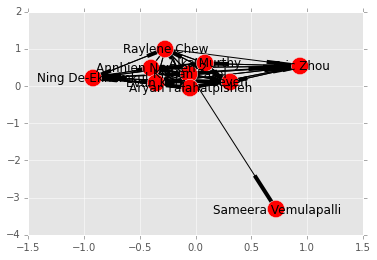

In [6]:
nx.draw_networkx(new_graph, pos=nx.spring_layout(new_graph))

In [7]:
nx.write_graphml(new_graph,'likes.graphml')